In [36]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tt

d = 7
x = np.linspace(0., 1., 2 ** d)

f = lambda x, y, z: np.exp(-(x-0.5)**2 - (y-0.4)**2) + np.exp(-(y-0.3)**2 - (z-0.6)**2) + x * y * z + np.sin(z) + 1
X, Y, Z = np.meshgrid(x,x,x)
U = f(X, Y, Z)
P = np.copy(U)

shape = [2 for i in range(3*d)]
shape = tuple(shape)
    
U = np.reshape(np.ravel(U), shape)

U_tt = tt.tensor(U)
P_tt = tt.tensor(P)

n = 15
t = (np.array((0.1))) ** (np.arange(n))
s = np.zeros(n)
l = np.zeros(n)
s1 = np.zeros(n)
l1 = np.zeros(n)

for i in range(n):
    s[i] = np.linalg.norm((P - P_tt.round(t[i]).full())/np.linalg.norm(P))
    l[i] = P_tt.round(t[i]).core.size/(2.**(3*d))
    s1[i] = np.linalg.norm((U - U_tt.round(t[i]).full())/np.linalg.norm(U))
    l1[i] = U_tt.round(t[i]).core.size/(2.**(3*d))

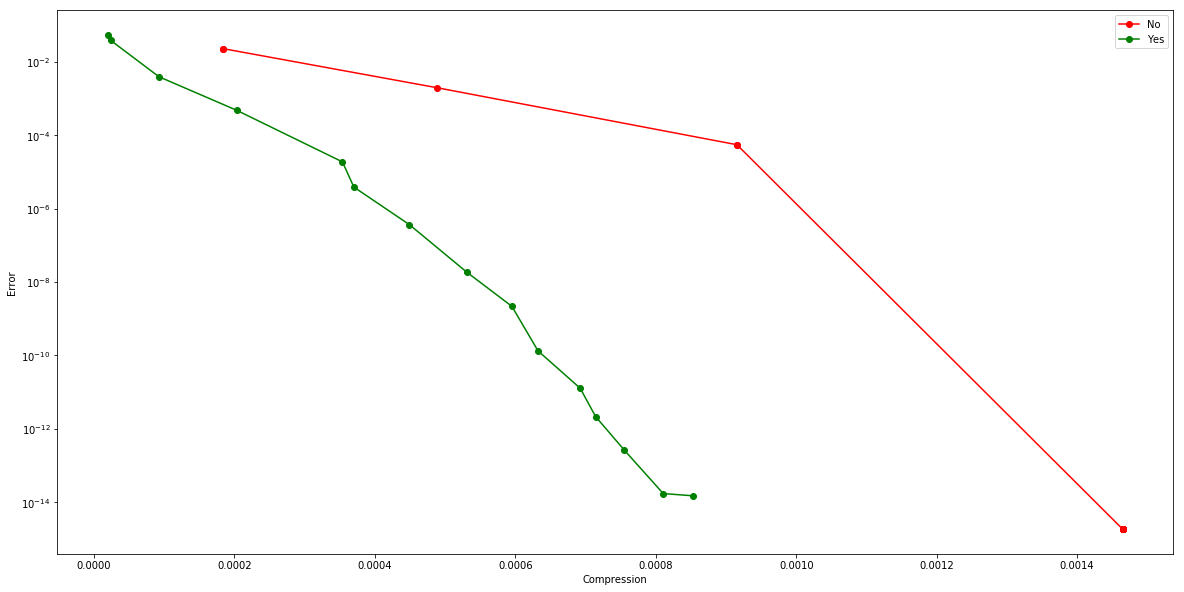

In [38]:
fig, ax = plt.subplots(figsize = (20,10))

line, = ax.semilogy(l, s, '-ro')
line.set_label('No')
line, = ax.semilogy(l1, s1, '-go')
line.set_label('Yes')
ax.set_xlabel('Compression')
ax.set_ylabel('Error')
ax.legend()

plt.savefig('func_compression.png', dpi = 100, format = 'png')
plt.show()